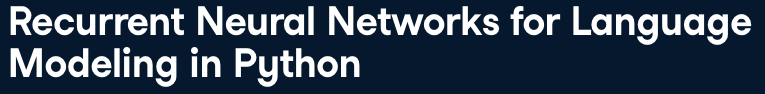
Machine Learning models are based on numerical values to make predictions/classification, but how can computers deal with text data? With the huge increase of available text data, applications such as automatic document classification, text generation, and neural machine translation became possible. In this course, you will learn how to use Recurrent Neural Networks to classify text (binary and multiclass), generate phrases simulating the character Sheldon from The Big Bang Theory TV Show, and translate Portuguese sentences into English. Are you ready to start your journey into Language Models using Keras and Python? Dive in!

# Recurrent Neural Networks and Keras

**Learning Objectives:**
- the foundations of Recurrent Neural Networks (RNN)
- how information flows through the network
- how to implement such models with Keras (sentiment classification)


One kind of data that is available (in abundance) on the Internet is text. From news articles to tweets, the volume of text data is increasing fast and is freely accessible to anyone with an Internet connection.
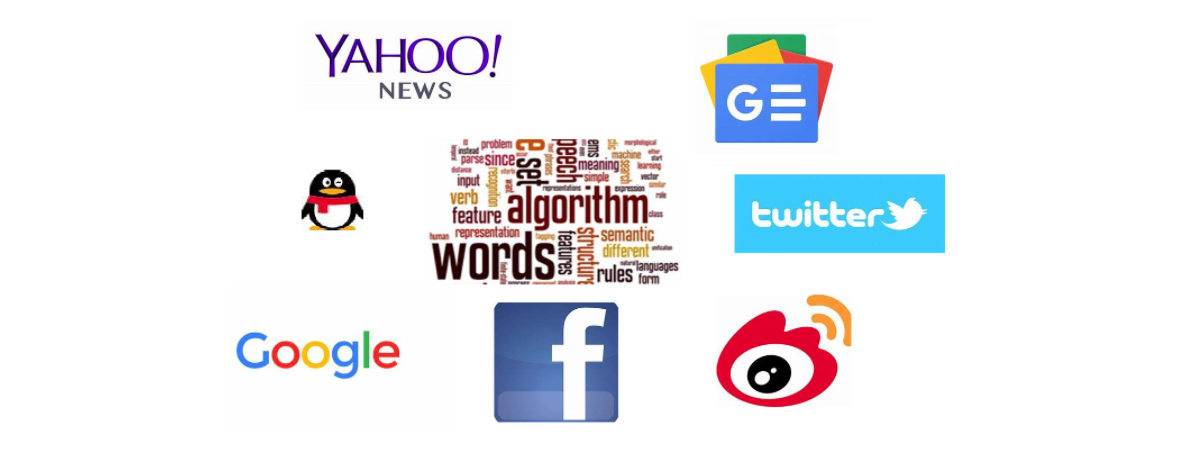

So, what can Data Scientists do with all this data? In this course we will introduce 4 applications: 
- sentiment analysis
- multi-class classification
- text generation
- machine neural translation

**Sentiment analysis** If you have an online customer interaction, you may be interested in knowing how your customers feel towards your brand or product. To do that, you can use sentiment analysis models and classify their messages into positive or negative.
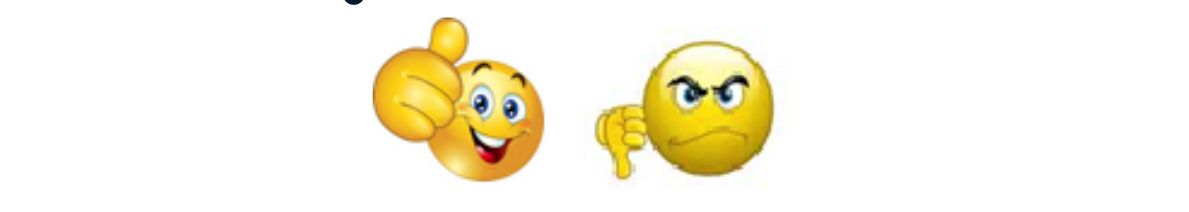

**Multi-class classification** Or you want to build a **recommender system** and need to categorize news articles into a set of pre-defined categories.

**Text generation** Also, it is possible to generate text automatically using a specific writing style, or automatically reply to messages.

**Neural machine translation** Lastly, it is also possible to create models that translate from one language to another.

**Recurrent Neural Networks** All these applications are possible with a type of Deep Learning architecture called Recurrent Neural Networks. So what is different about RNN architectures, and why do we use it? The main advantages to use RNN for text data is that it reduces the number of parameters of the model (by avoiding one-hot encoding) and it shares weights between different positions of the text. In the example, the model uses information from all the words to predict if the movie review was good or not.
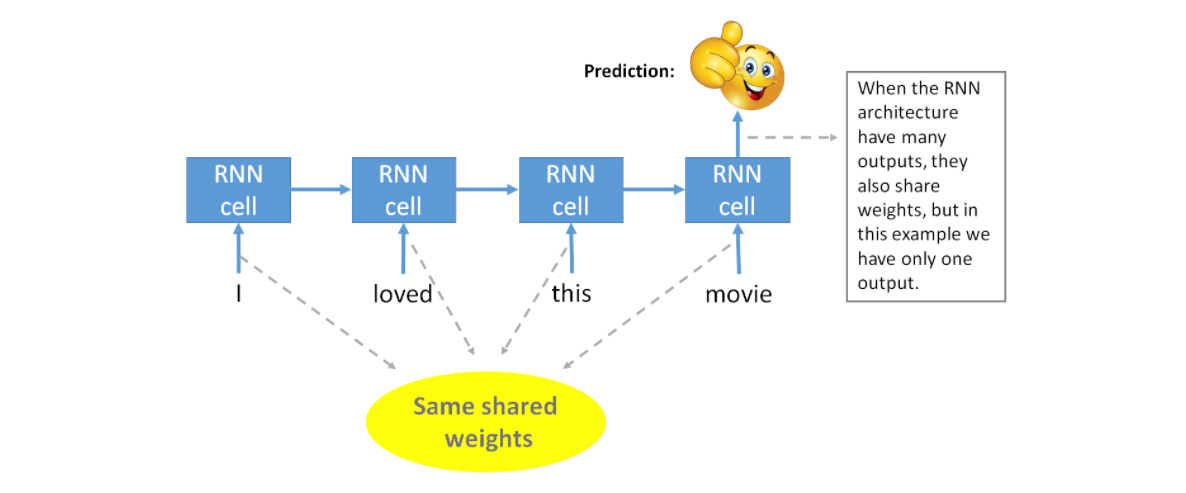

**Sequence to sequence models** RNNs model sequence data and can have different lengths of inputs and outputs. Many inputs to one output is commonly used for classification tasks, where the final output is a probability distribution. This is used on sentiment analysis and multi-class classification applications.
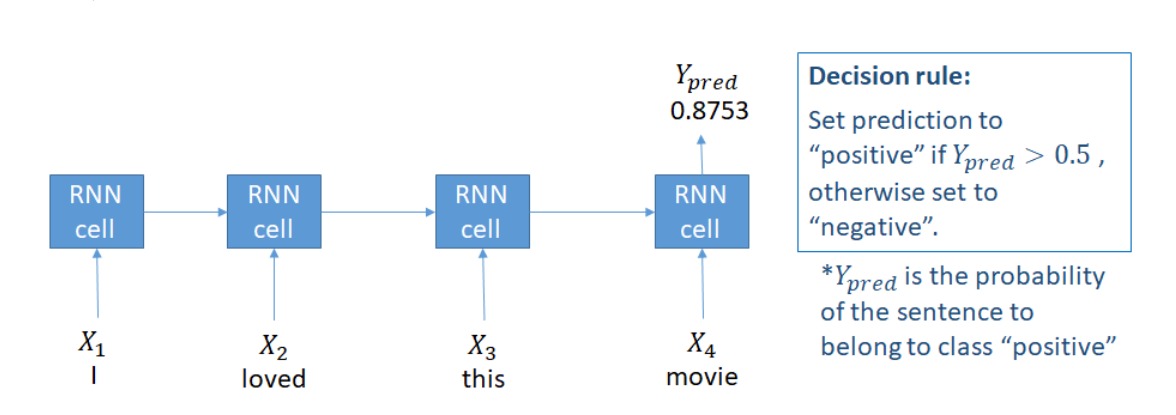

Many inputs to many outputs for text generation start the same as in the classification case, but for the outputs, it uses the previous prediction as input to the next prediction.
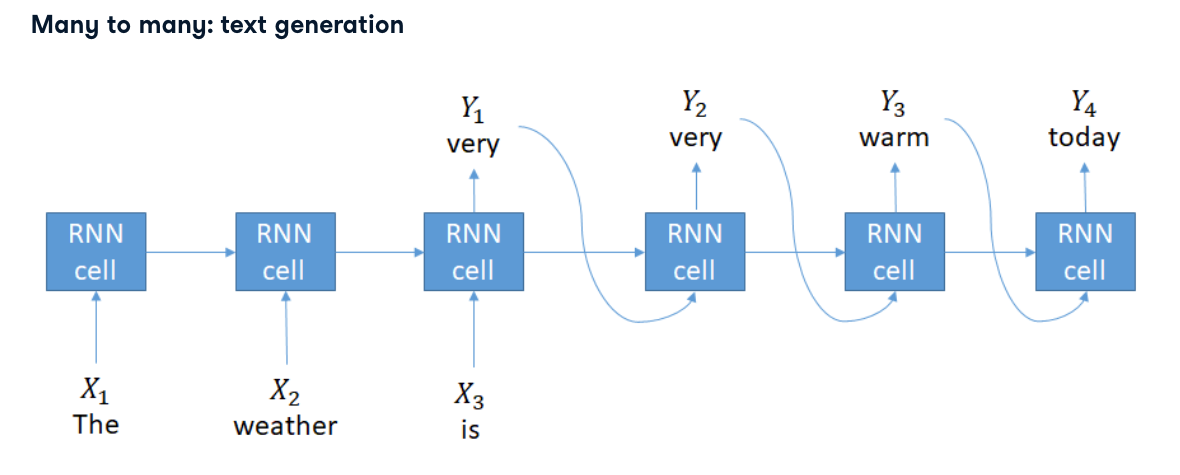

Many inputs to many outputs for neural machine translation is separated in two blocks: encoder and decoder. The encoder learns the characteristics of the input language, while the decoder learns for the output language. The encoder has no prediction (no arrows going up), and the decoder doesn't receive inputs (no arrows from below).
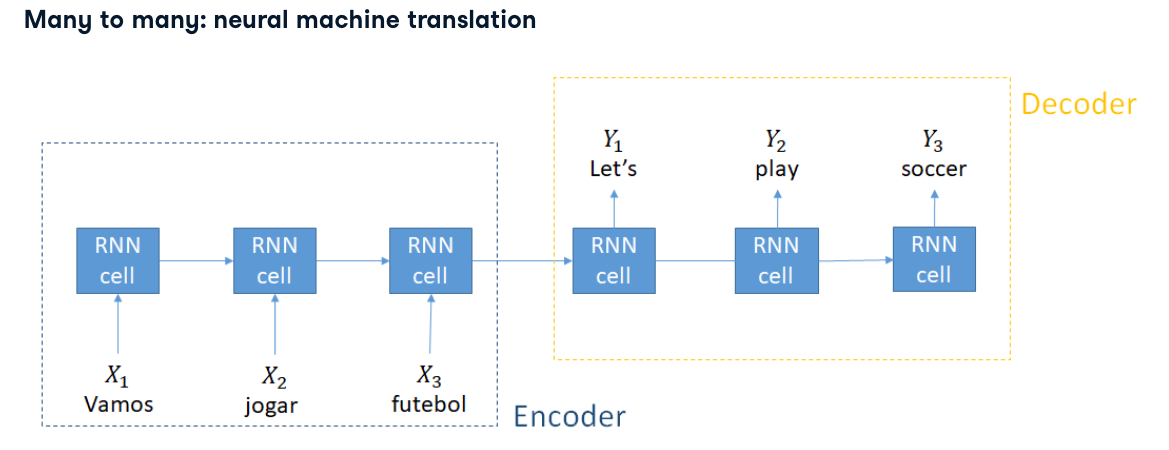

Many inputs to many outputs for language models starts with an artificial zero input, and then for every input word i the model tries to predict the next word i plus one.

### Language Modeling

You will learn in more detail how to create a language model from raw text data.

**Sentence probability** Language models represent the probability of a sentence. For example, what is the probability of the sentence I love this movie? What is the probability of each word in this sentence to appear in this particular order? The way this probability is computed changes from one model to another. Unigram models use the probability of each word inside the document, and assume the probabilities are independent. N-gram models use the probability of each word conditional to the previous N minus one words. When N equals to 2 it's called bigram, and when it is equal to 3 it's called trigram.
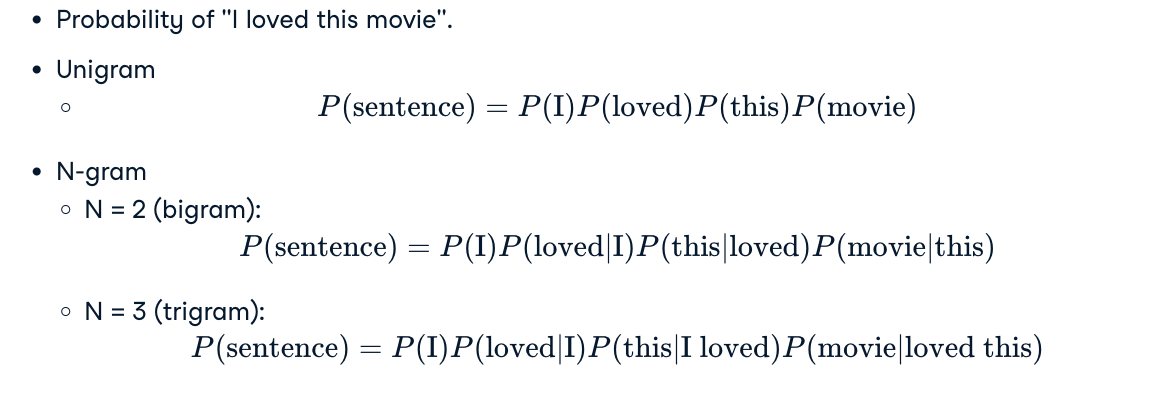

The Skipgram model does the opposite, computes the probability of the context words, or neighboring words, given the center word. Neural networks models with a softmax function in the last layer of the model with units equal to the size of the vocabulary are also language models.
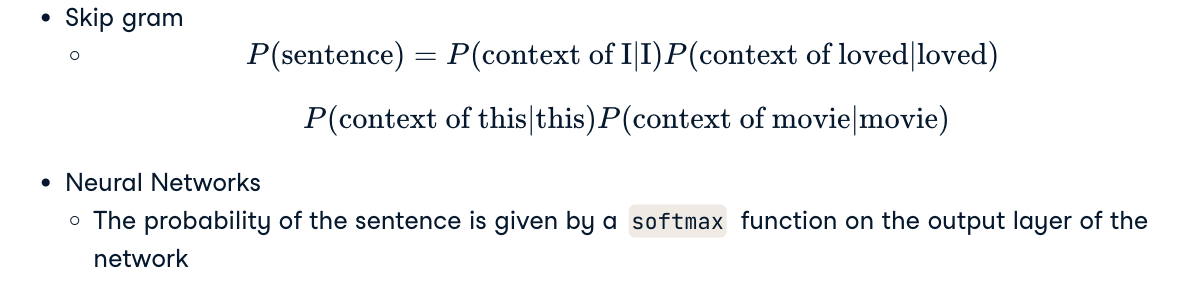

**Link to RNNs** We are focusing on Recurrent Neural Networks. So how exactly are language models related to them? Well, everywhere! Recurrent Neural Network models are themselves language models when trained on text data, because they give the probability of the next token given the previous k tokens.
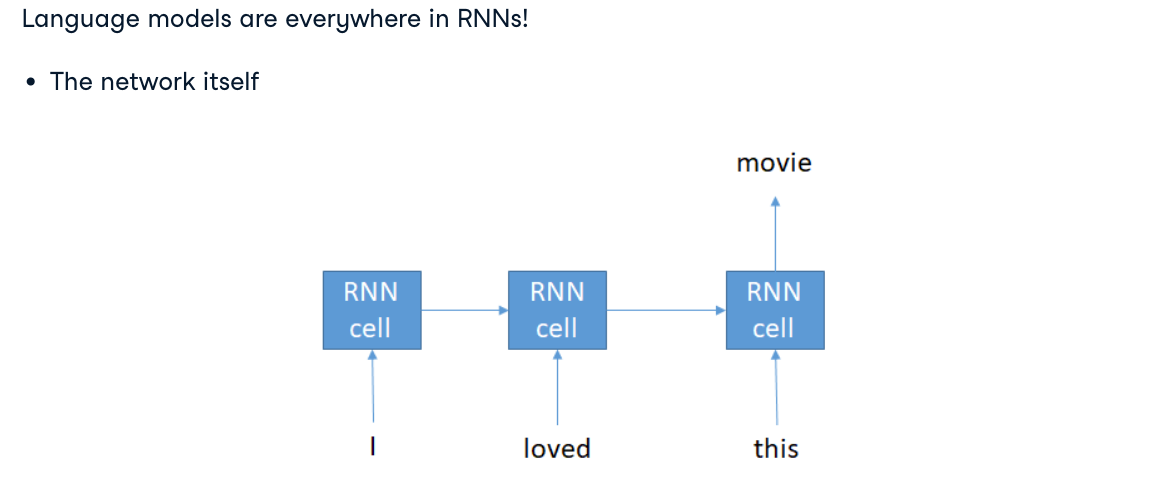

Also, an embedding layer can be used to create vector representations of the tokens as the first layer.
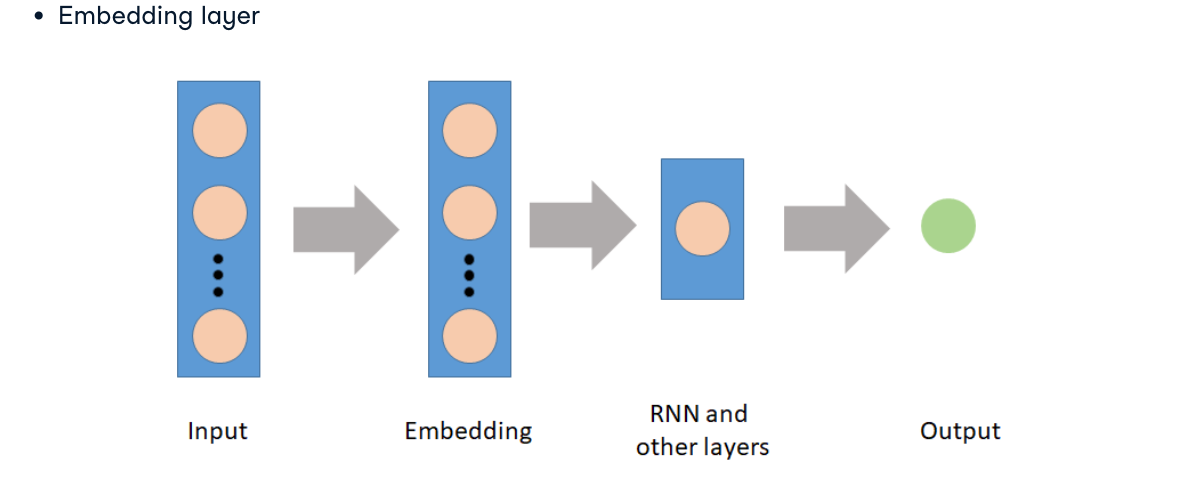

**Building vocabulary dictionaries** When creating RNN models, we need to transform the text data into a sequence of numbers, which are the indexes of the tokens in the array of unique tokens, the vocabulary. To do that, we first need to create an array containing each unique word of the corpus. We can use the combination list-set to create a list of unique words. And we can get all words in a text by splitting the text using space as the separator.
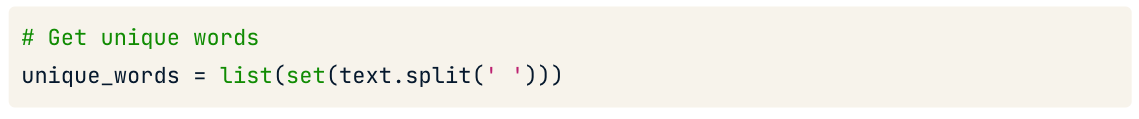

We can now create dictionaries that map words to their index on the vocabulary and vice versa using dictionary comprehension. By enumerating a list, we obtain the numeric indexes and the items as tuples, and we can use them to create key-value dictionaries. The first dictionary uses the words as keys and the indexes as values, it can transform the text into numerical values. 
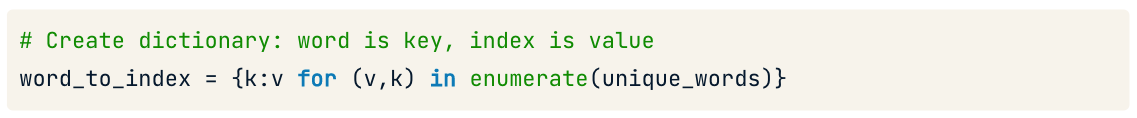

The later one is used to go back from numbers to words, since it has indexes as keys and words as values.
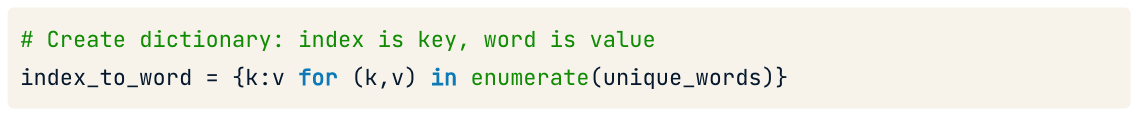

**Preprocessing input** With the created dictionaries, we can prepare pairs of X and y to be used on a supervised machine learning model. For that, we can loop into the sequences of numerical indexes in blocks of fixed-length size. We use the initial words as x and the final word as y, and shift the text step words forward. If we use a step equal to 2, it means that the X sentences will be shifted by 2 words at a time.
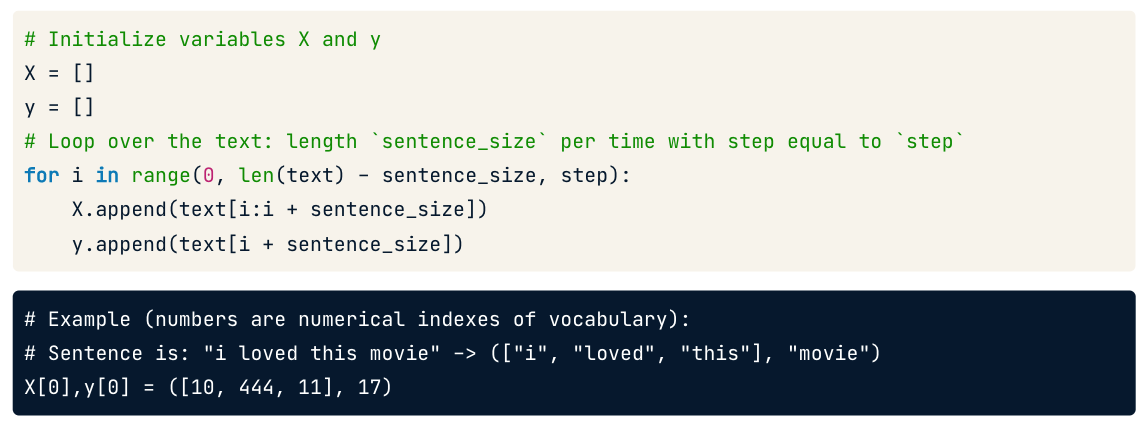

**Transforming new texts** When preparing new data, we can use the dictionary to get the correct indexes for each word. Using the example on the slide, create a list that will contain the transformed text. Loop for every sentence of the new text create a temporary list that will contain the current sentence. iterate over all words of the sentence by splitting the sentence on it's white spaces. get the index using the dictionary append the index to the sentence list then, append the sentence of indexes on the first list you created, new text split.
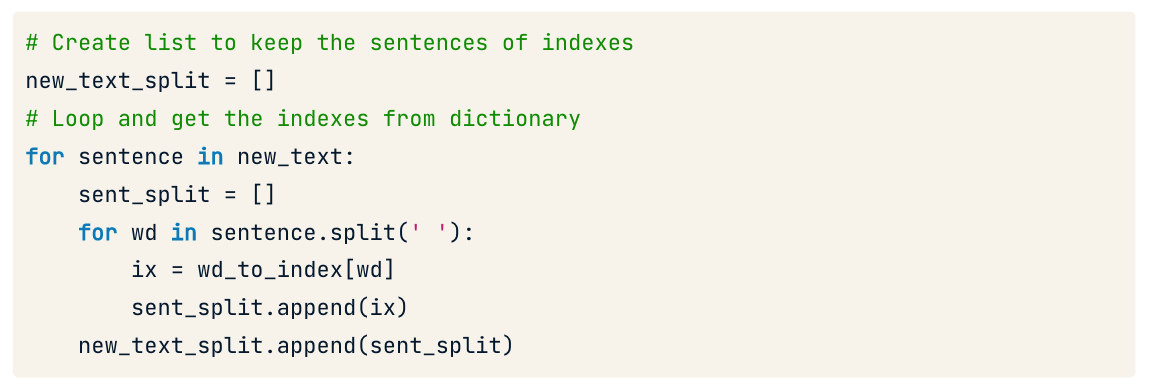

You saw that Language models gives the probability of a sentence. To train the model, you first need to prepare the raw text.

### RNN inside Keras

In this lesson, we implement the RNN models using keras. Previously, you were introduced to the architecture of language models. Now we will use keras to create and train RNN models.

**What is keras?** Keras is a high-level API with deep learning frameworks as background. It is possible to configure keras with Tensorflow, CNTK or Theano. To install keras, we can simply use the Python package manager pip. After installation, we can use its modules to execute fast experimentation and research. Next we will introduce the main modules of keras that will be useful for the language models
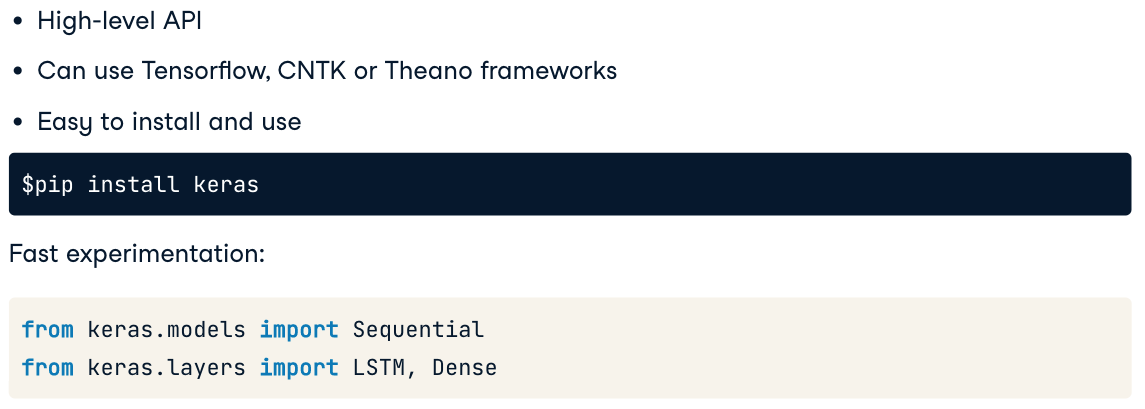

**keras.models** keras models contain two classes of models. The Sequential class has a structure where each layer is implemented one after the other, meaning that the output of one layer is the input of the next one. The Model class is a generic definition of a model that is more flexible and allows multiple inputs and outputs.
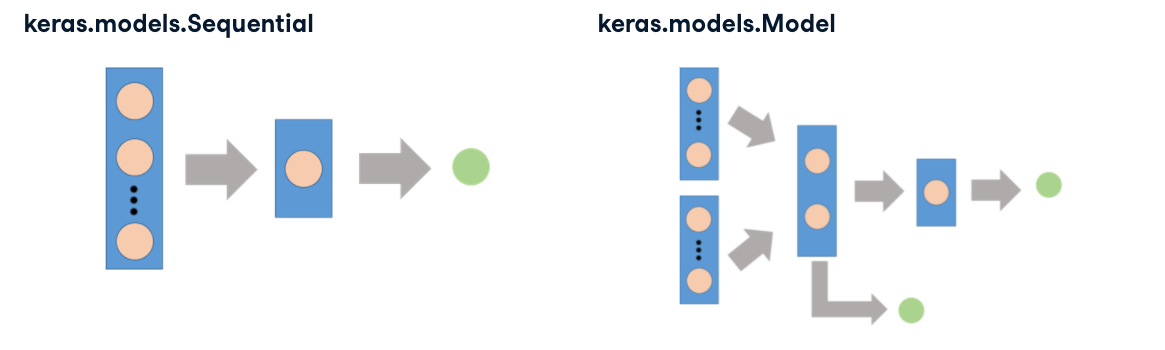

**keras.layers** keras layers contains the different types of layers including the LSTM and GRU cells. Other layers that we will use are Dense, Dropout, Embedding and Bidirectional.
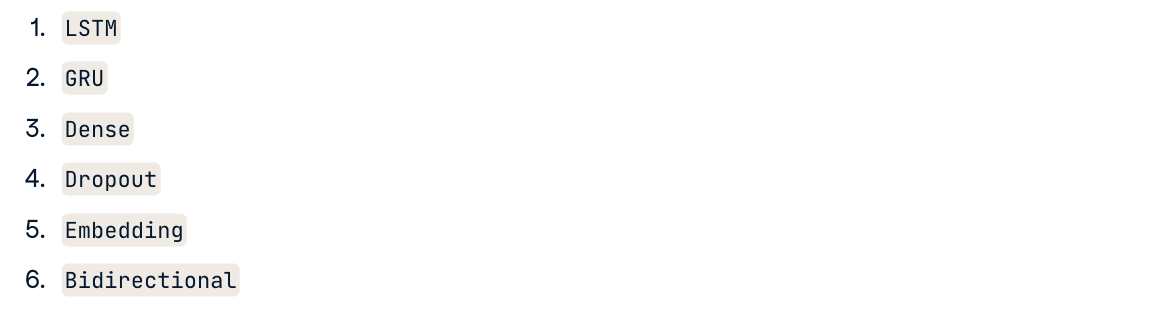

**keras.preprocessing** keras preprocessing contains useful functions for pre-processing the data such as the pad_sequences method that transforms text data into fixed-length vectors. In the example, we padded the texts to equal length of 3.
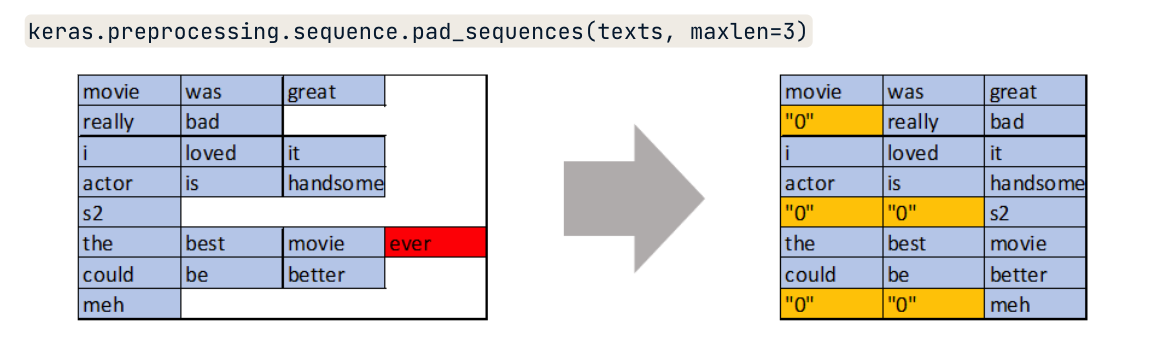

**keras.datasets** The datasets module contains useful datasets. For example, the imdb movie reviews that is used for sentiment analysis. Also, the **reuters newswire dataset used for topic classification with 46 classes**. There are also other datasets that you can check on the keras website.

**Creating a model** You can build a Sequential model in keras with just a few lines of code. Import the required classes as: from keras dot models import sequential from keras dot layers import dense Then, instantiate the class in the variable called model with: model equals to sequential open and close parenthesis. Add desired layers with the method add as in: model dot add dense 64, activation equals to the string relu, input_dim equals to 100 The parameter input dim declares the shape of the input data, which is mandatory for the first layer in the model. Then add the output layer: model dot add dense 1, activation equal to the string sigmoid Finally, we compile the model by executing the compile method of the class. We pass the string adam to the optimizer parameter, the string mean squared error to loss, and a single-element list containing the string accuracy to the metrics parameter
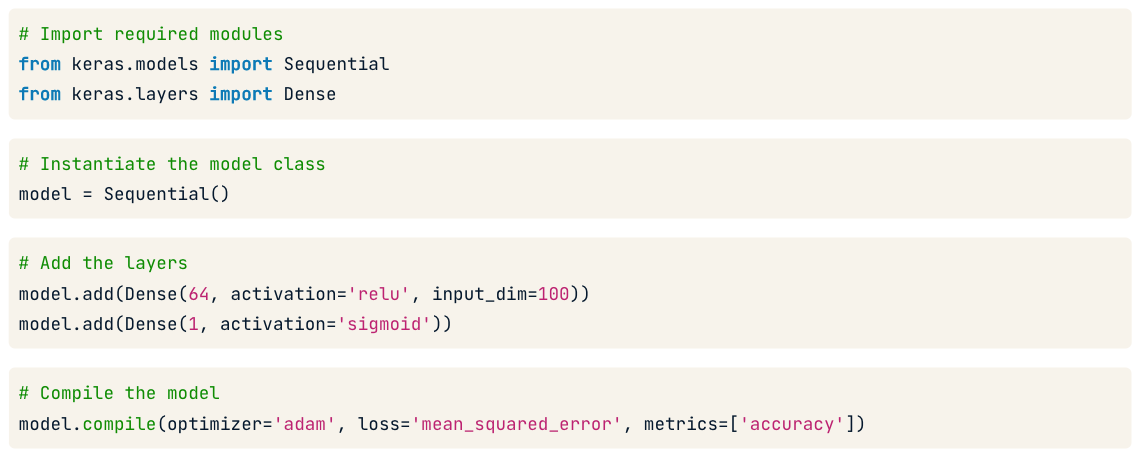

**Training the model** To train the model, we use the fit method on the training data. For example: model dot fit x train, y train, epochs equal to 10 batch_size equal to 32 epochs is the number of iterations over the entire dataset and defaults to one. batch size is the size of a subset of the data that will be used on each step. When the dataset cannot fit in the memory this is crucial. It defaults to 32.
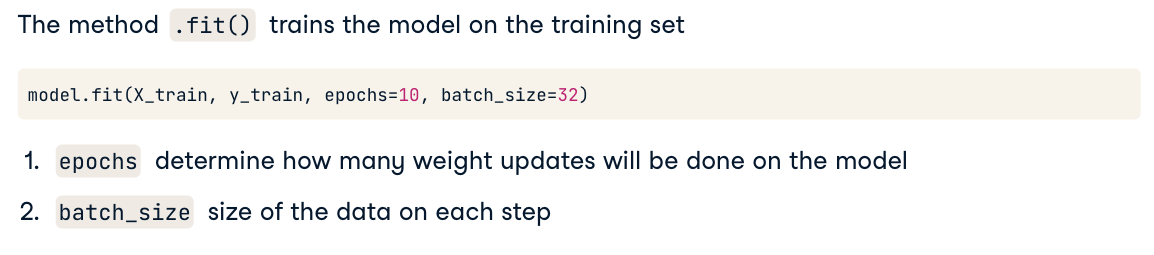

**Model evaluation and usage** To analyze the model's performance, we can use the method evaluate as model dot evaluate x-test comma y-test This method returns the loss and accuracy values. To use the model on new data, use the method predict as: model dot predict new_data
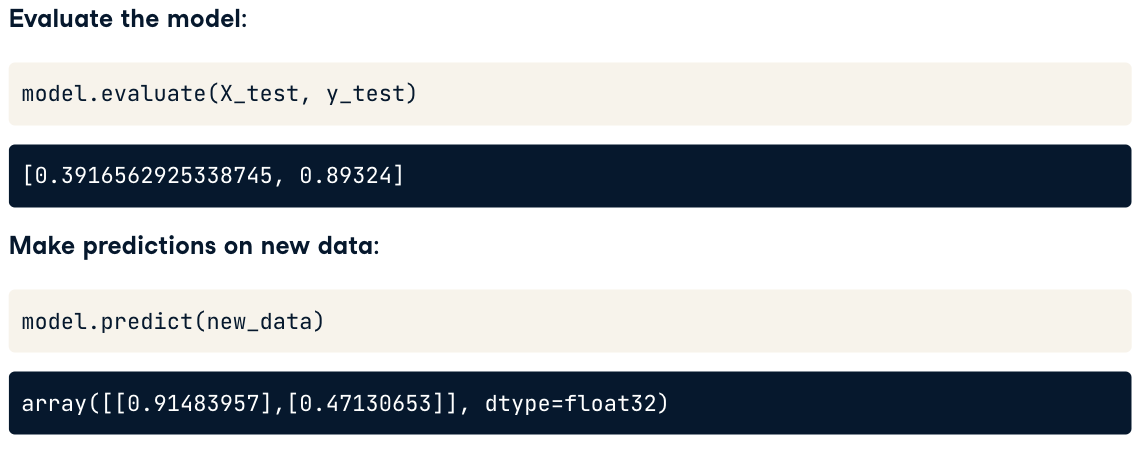

**Full example: IMDB Sentiment Classification** To create a full example, let's instantiate the Sequential class, add three layers (don't bother with new layers for now, we will explain them in details on chapter 2) and compile. Next, we can use the training set to fit the model. And measure its accuracy on the test set.
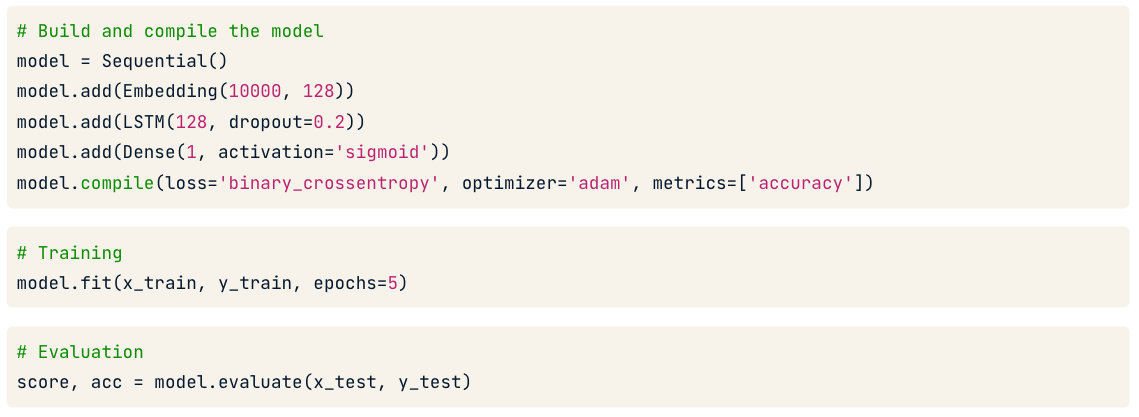

You learned the main modules present in keras, and how to create, evaluate and use the model.

# RNN Architecture

**Learning Objectives:**
- vanishing and exploding gradient problems
- & how to deal with them with the GRU and LSTM cells
- create embedding layers for language models

### Vanishing & Exploding Gradients

You learned how to prepare text documents and use them on a RNN model to classify sentiment on movie reviews. But, the accuracy was not as expected! In this lesson you will be introduced to some pitfalls of vanilla RNN cells, which are the vanishing or exploding gradient problems, and how to deal with them.

**Training RNN Models** To understand the vanishing or exploding gradient problems, you first need to understand how the RNN model is trained. In other words, how to perform back propagation. In this picture, you can see the forward propagation and back propagation directions. The important part here is that the they follow two directions: vertical (between input and output) and horizontal (going through time) . Because of this horizontal direction, back propagation is referred as back propagation through time.
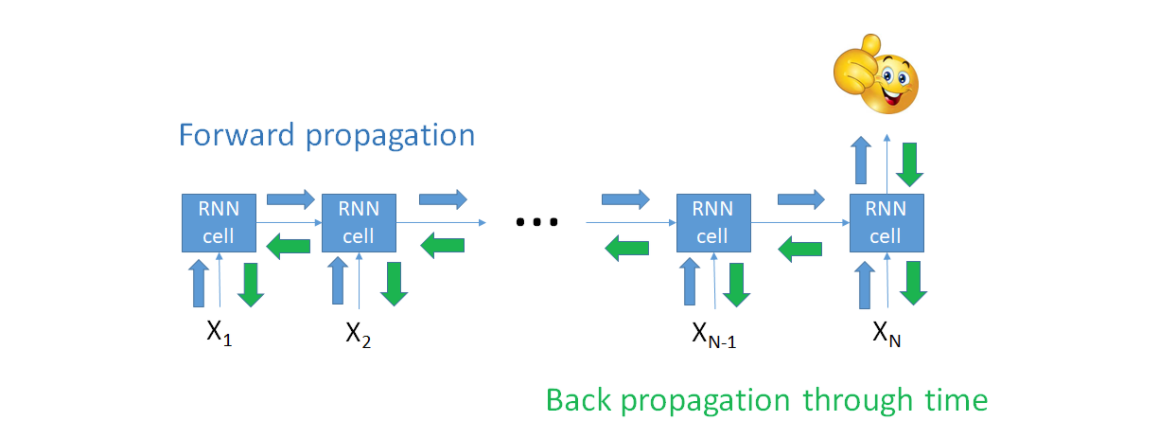

**Forward propagation** In the forward propagation phase, we compute a hidden state a that will carry past information by applying the linear combination over the previous step and the current input. The output y is computed only in the last hidden state often by applying a sigmoid or softmax activation function. The loss function can be the cross-entropy function and we use it to have a numeric value of the error. We can see that the past information is carried out during the forward propagation with an example. The second step combines the results from the first step, and receive the second word as input. We can also see that the weight matrix Wa is used on all steps, which means the weights are shared among all the inputs.
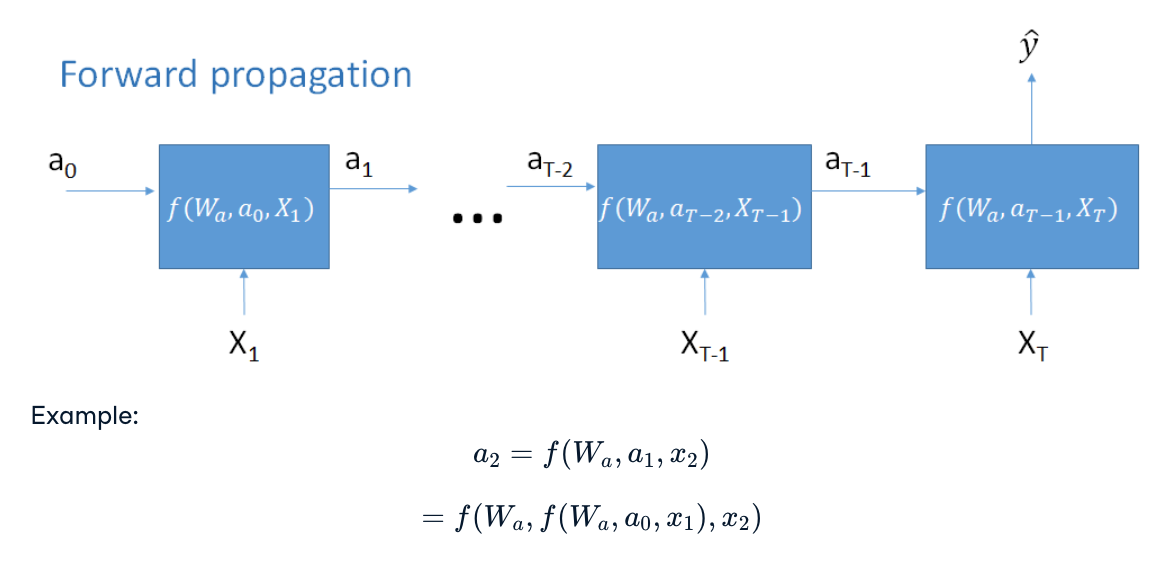

**Back propagation through time (BPTT)** In the back propagation phase, we have to compute the derivatives of the loss function with respect to the parameters. To compute the derivative of the loss with respect to the matrix Wa, we need to use the chain rule because y hat depends on a_t which also depends on Wa. But, a_t also depends on a_t minus 1 that depends on Wa. Thus, we need to consider the contribution of every previous step by summing up their derivatives with respect to the matrix Wa. Also, the derivative of at with respect to Wa also need the chain rule of derivatives and can be written as the product of the intermediate states multiplied by the derivative of the first state with respect to the matrix.
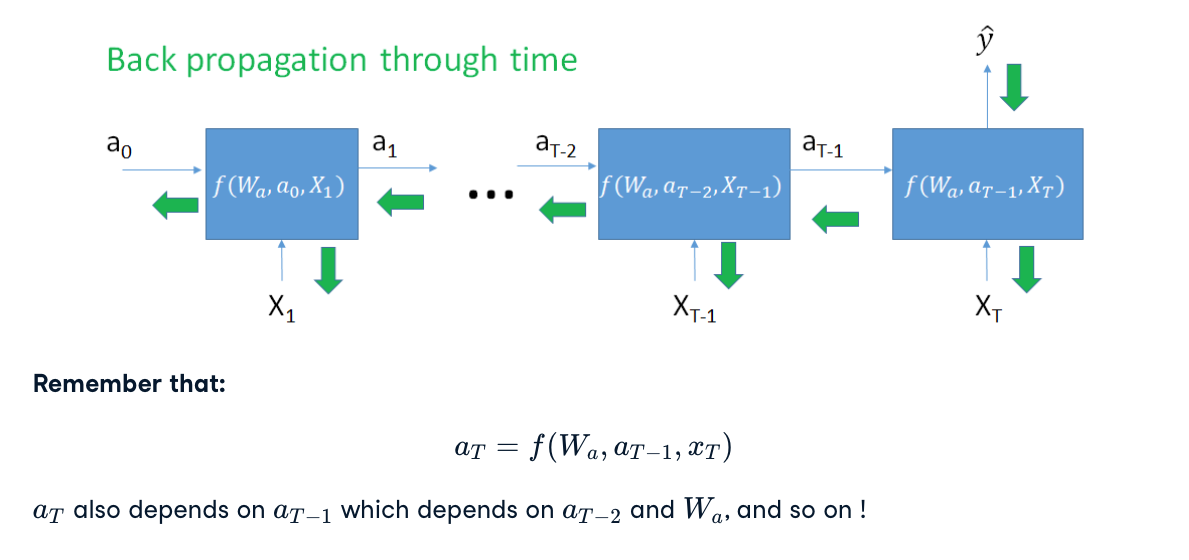

Not going into too much detail on the math, when computing the gradients of the loss function with respect to the weight matrix we obtain the matrix Wa power t minus one multiplied by a term. Intuitively, if the values of the matrix are below one, the series will converge to zero, and if its values are above one it will diverge to infinity.
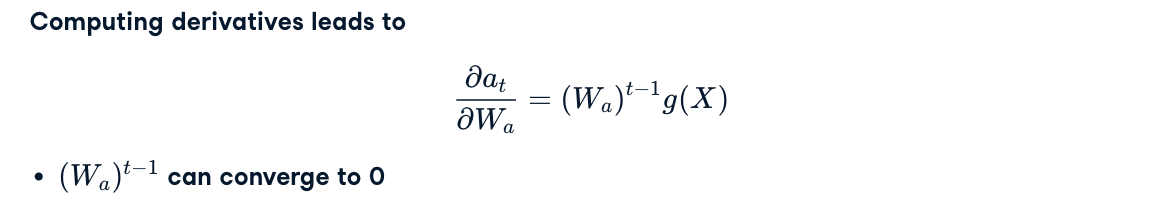

**Solutions to the gradient problems** Researchers found some approaches to avoid these problems. Limiting the size of the gradients or scaling them can easily help us avoid the exploding gradient problem Initializing the matrix W as an orthogonal matrix makes their multiplication always be equal to one Using regularization controls the size of the entries By using the ReLU activation function, the derivative becomes a constant, and thus doesn't increase or decrease exponentially Finally, use other RNN cells such as GRU and LSTM that we will learn later.
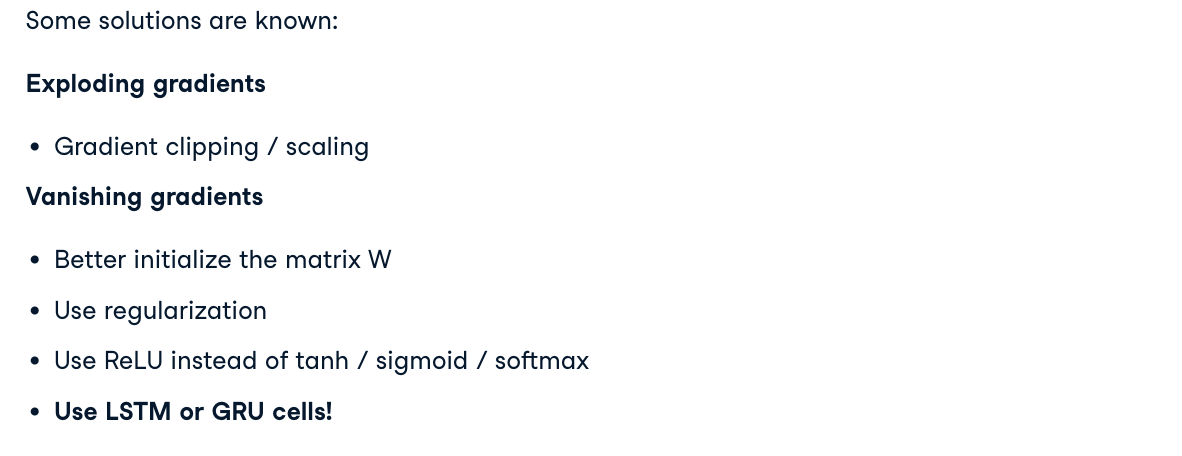

### GRU & LSTM Cells

In this lesson you will learn about two different RNN cells that will achieve good results in language modeling and solve the vanishing gradient problem.

**SimpleRNN cell in detail** Let's first have a detailed look of the SimpleRNN cell. On every cell, we compute the new memory state based on the previous memory state t minus one and the current input word Xt. In the computations, we have a weight matrix Wa that is shared between all steps. We will consider the case of classification tasks and thus the output y hat will be computed only in the last step.
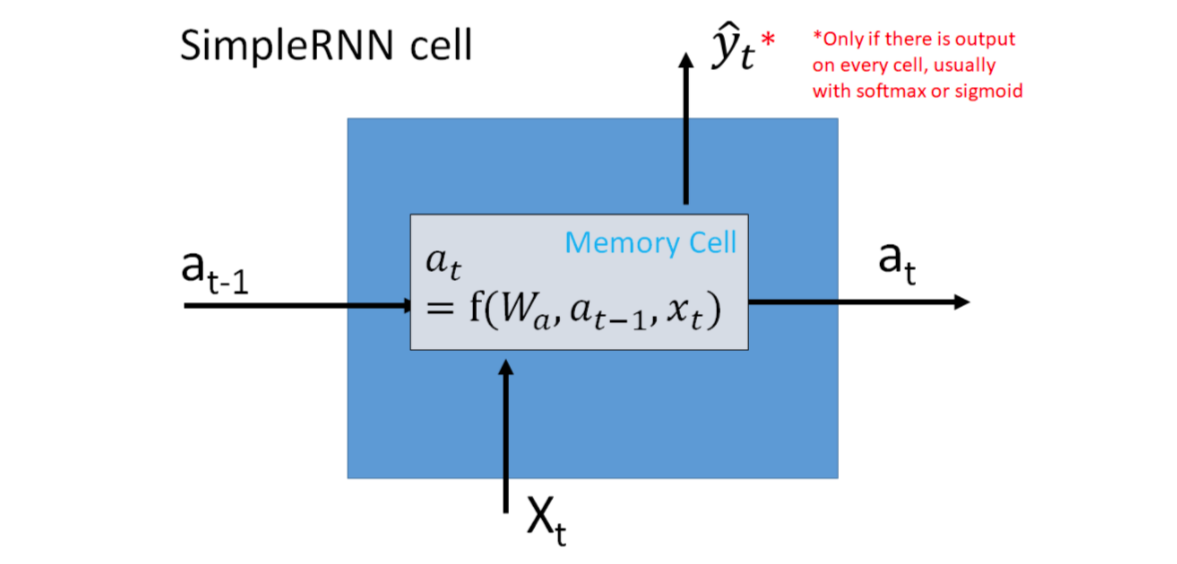

**GRU cell** GRU cells were proposed in 2014, and add one gate to the vanilla RNN cell. Now before updating the memory cell, we first compute a candidate a-tilde that will carry the present information. Then we compute the update gate GU that will determine if the candidate a tilde will be used as memory state or if we keep the past memory state a minus one. If the gate is zero, the network keeps the previous hidden state, and if it is equal to one it uses the new value of a tilde. Other values will be a combination of the previous and the candidate memory state, but during training it tends to get close to zero or one.
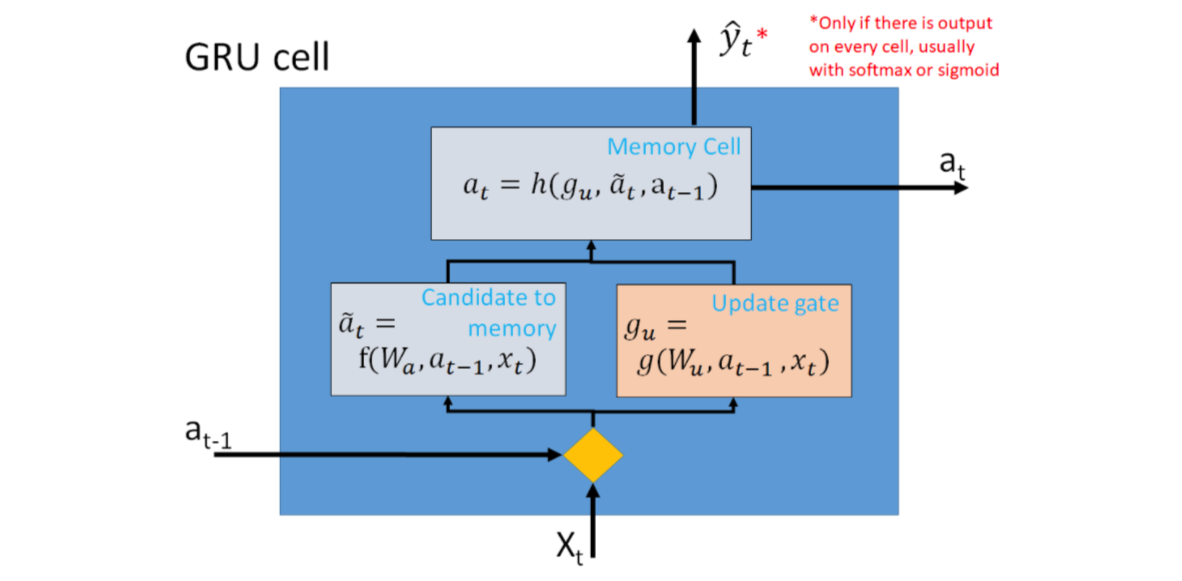

**LSTM cell** LSTM was first proposed in 1997, and adds three gates to the vanilla RNN cell. The forget gate g_f determines if the previous state c_t minus one state should be forgotten (meaning to have its value set to zero) or not. The update gate g_u do the same for the candidate hidden state c tilde. The output gate g_o do the same for the new hidden state c_t. The green circles on the picture represent the gates. We can think of them as an open or closed gate, allowing for the left side to pass through or not if the gates value are 0 or 1 respectively.
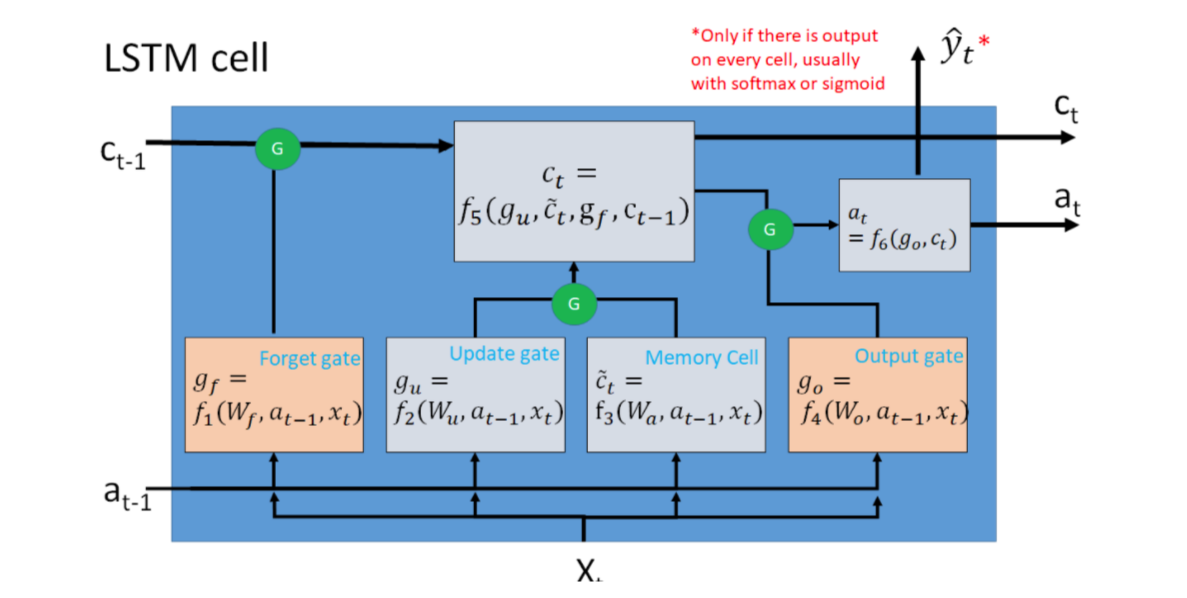

**No more vanishing gradients** Because GRU and LSTM cells add gates to the equations, the gradients are no longer only dependent on the memory cell state. The derivative of the loss function with respect to the weights matrix depends on all the gates and on the memory cell, summing each of its parts. Without going into deeper details on the math, this architecture adds the different gradients (corresponding to the gradients of each gate and the memory state), making the total gradient stop converging to zero or diverging. On every step, if the gradient is exponentially increasing or decreasing, we expect the training phase to adjust the value of the corresponding gate accordingly to stop this vanishing or exploding tendency.
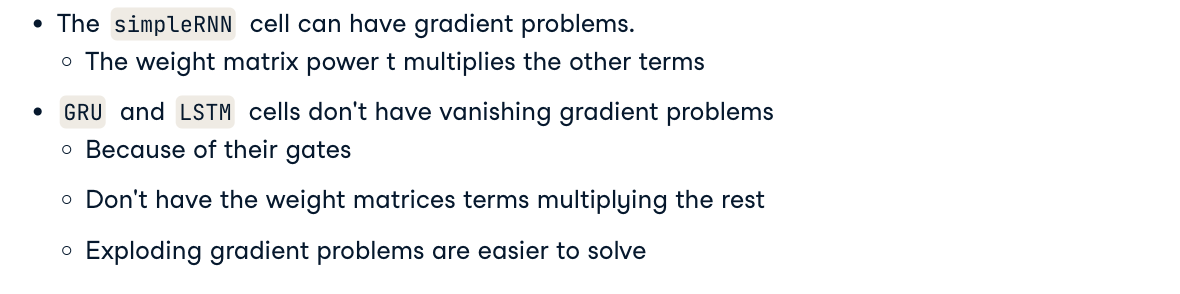

**Usage in keras** Without further discussing the intuition and the theory, let's put the new RNN cells in practice inside keras. First, the layers with the GRU and LSTM cells are available in the keras dot layers dot recurrent, with a shortcut on keras dot layers. To use the GRU and LSTM cells on a keras model, we simple add them as usual. The important parameters are the number of units, meaning the number of memory cells to keep track, and the return sequences parameter that is used when adding more than one layer in sequence, making all the cells to emit an output that will be fed to the next layer as input.
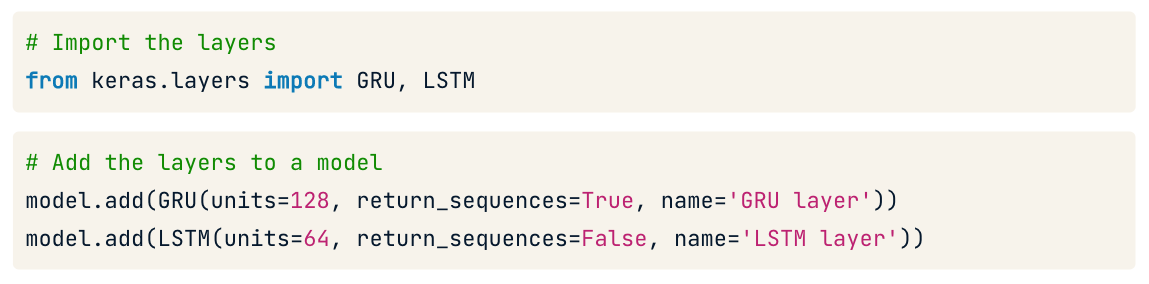

### The Embedding Layer

You will learn now about vectorization of a language model using the embedding layer in keras, and how it can be used for transfer learning.

**Why embeddings** The first reason to use embeddings is because the one-hot encoding of the tokens in a scenario with a very big vocabulary (maybe 100 thousands words) demands a lot of memory. An embedding layer with dimension, say, 300 is more viable. Also, embeddings are a dense representations of the words, and the implementations gives surprisingly nice understanding of the tokens. Like the famous king minus man plus woman equals to queen. Finally, it can be used for transfer learning. On the other hand, it demands training lots of parameters to learn this representation, and can make training slower.
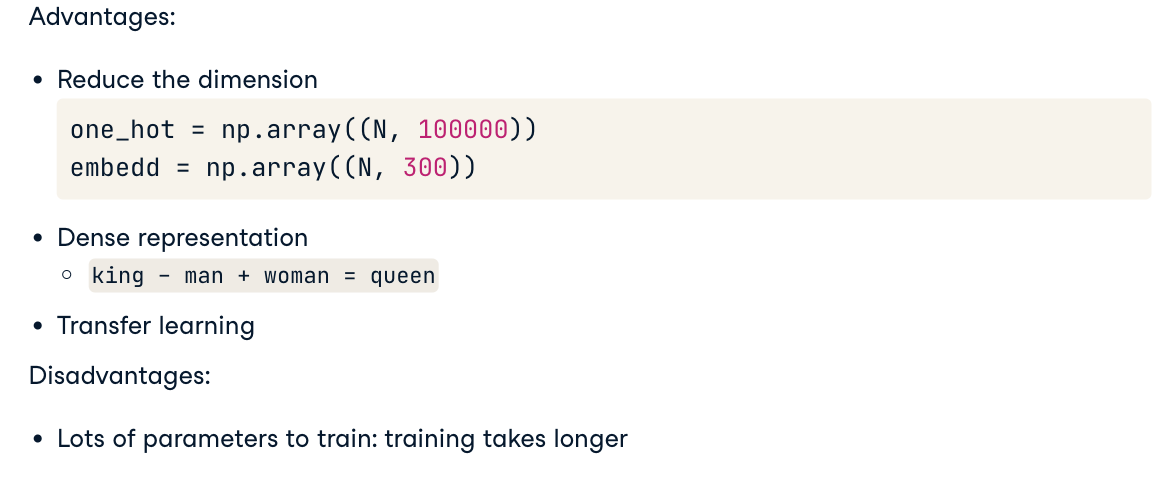

**How to use in keras** To use the embedding layer in keras, we first import it from keras dot layers module. The embedding layer should be the first layer of the model. The relevant parameters include: input dim, which is the size of the vocabulary output dim, which is the dimension of the embedding space trainable, that defines if this layer should have its weights updated or not during the training phase embedding initializer, that can be used to perform transfer learning by using pre-trained weights for the words in your vocabulary. Often, when using transfer learning we set trainable to False, but it is not mandatory. The final parameter is the input length, which determines the size of the sequences (it assumes that you padded the input sentences beforehand)
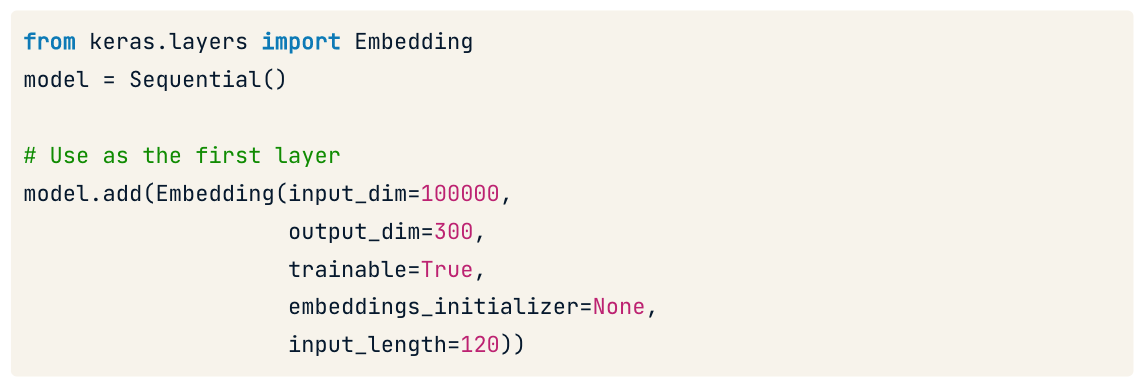

**Transfer learning** There are many pre-trained vectors that were trained on big datasets such as the Wikipedia, news articles, etc. To train a model on those big sets demand a lot of computer power, but loading the weights does not! Recent advances in NLP and language models research is based on open sourcing pre-trained weights on big datasets using popular models such as glove, word to vec and bert, among others. In keras, we need the constant initializer to define the pre-trained matrix of the Embedding layer.
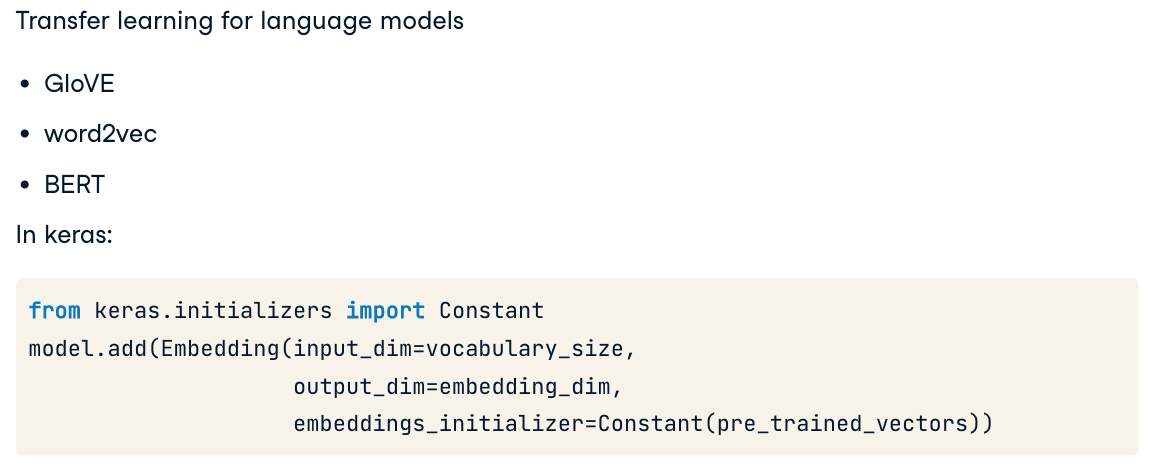

**Using GloVE pre-trained vectors** Glove files contain rows separated by spaces, where the first column is the word and the others are the weights values for each dimension of the embedding space. To read the values, then, we loop over the rows of the file, split the line by spaces, get the word as the first item of the list and the rest of the list are the weights. We use dictionaries to easily store for each word an np array with the values. We also cast the values to have float32 type because it is the type used to create the vectors.
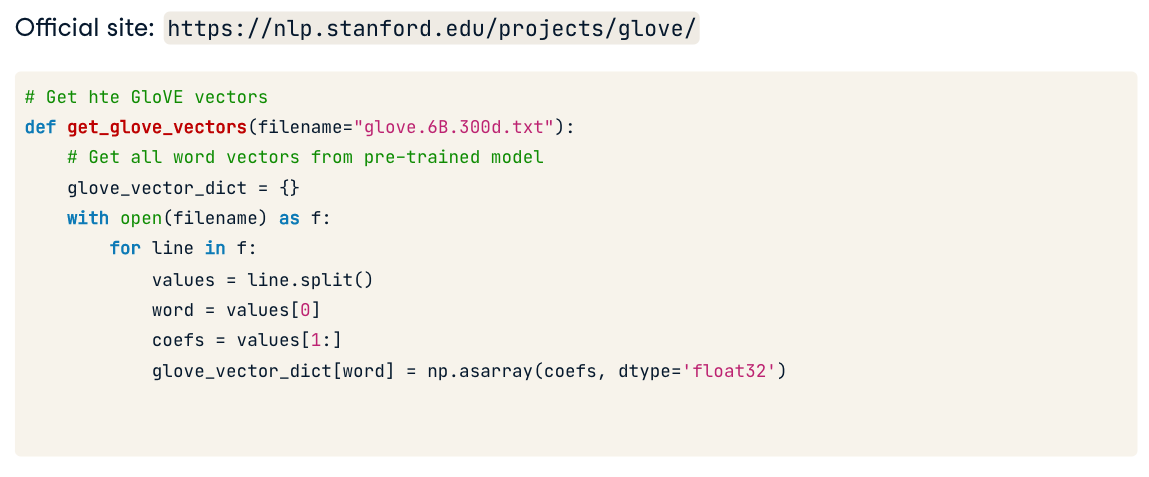

**Using the GloVE on a specific task** To use the GloVE vectors in a specific task, we can simply select the words present on the vocabulary list, ignoring the other words to save memory. We need the task-specific vocabulary dictionary with words as keys and indexes as values, the glove dict created in the previous slide and the dimension of the embedding space as inputs. We define a matrix with shape equal to the number of words plus one and the embedding space dim. We add one because the index zero is reserved for the padding token. We iterate over the vocabulary words, if the word is found in the glove vectors, then we update this row of the matrix with the values from glove.
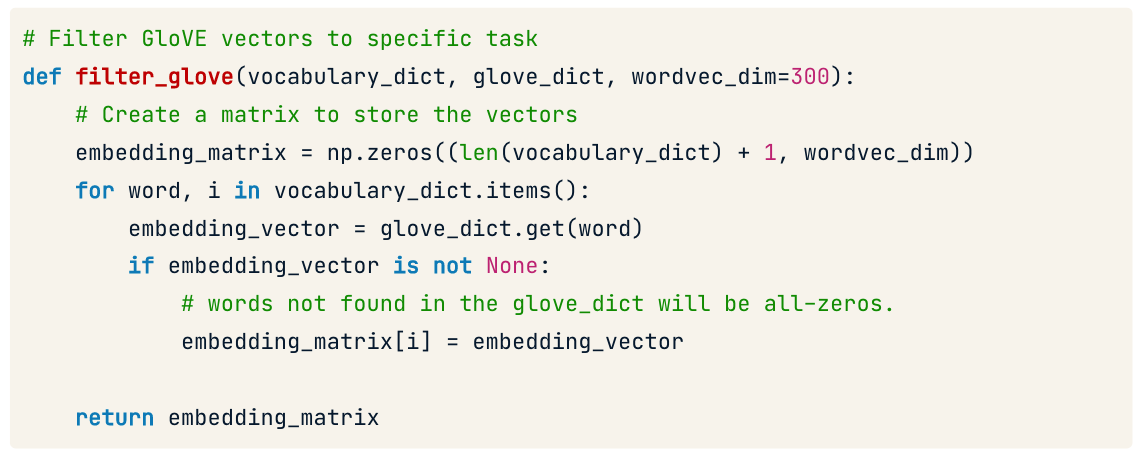

### Sentiment Classification Revisited

You learned about different RNN architectures such as GRU and LSTM, and also about the embedding layer. Those are the first steps to tune a RNN model and improve performance. Let's put it all together to form a better model.

**Previous results** In the first chapter of this course, you implemented a simple RNN model to classify sentiment on the IMDB dataset. But the performance was really poor and achieved less than 50% accuracy.
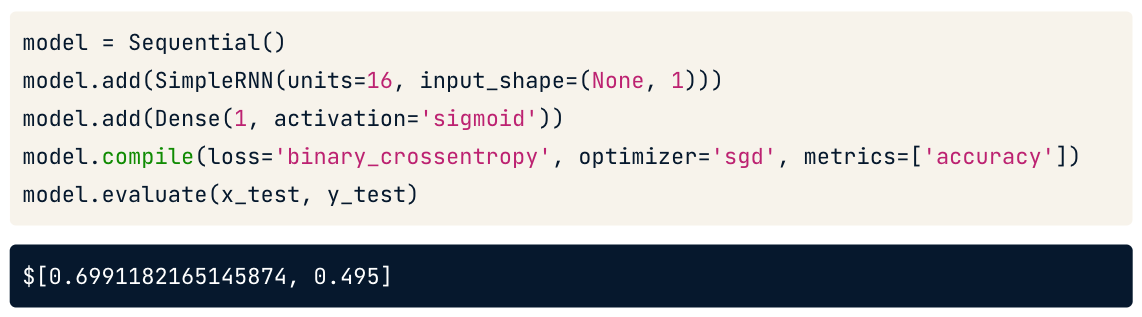

**Improving the model** You learned some approaches to improve the model's performance. In summary, we can: Add the embedding layer, increase the number of layers, tune the parameters, increase the vocabulary size, accept longer sentences with more memory cells.
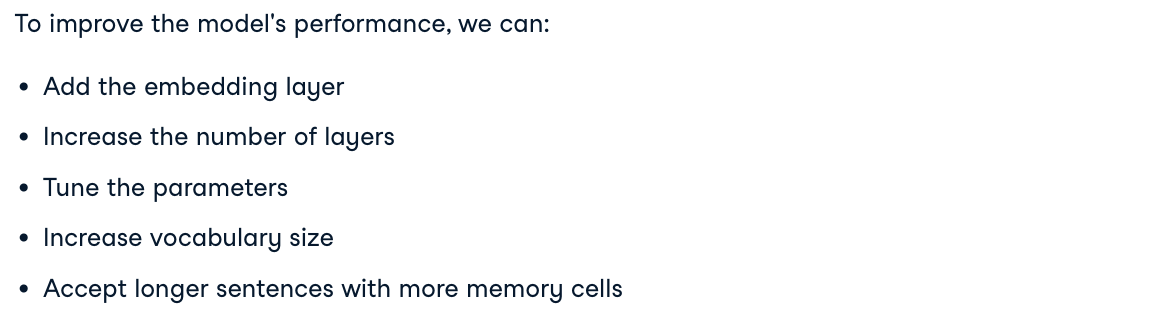

**Avoiding overfitting** RNN models can overfit even with a few epochs like 10. If the model overfits, we can test using different batch sizes because RNN models are very sensitive to them since the batch size determines the number of updates in the weights that will be performed Also, adding dropout layers and using the parameters dropout recurrent dropout can add extra noise to the training data, forcing the model to be more general and reduce overfitting. The parameter dropout on RNN layers removes a percentage of the input data, while the recurrent dropout removes a percentage of the memory cell
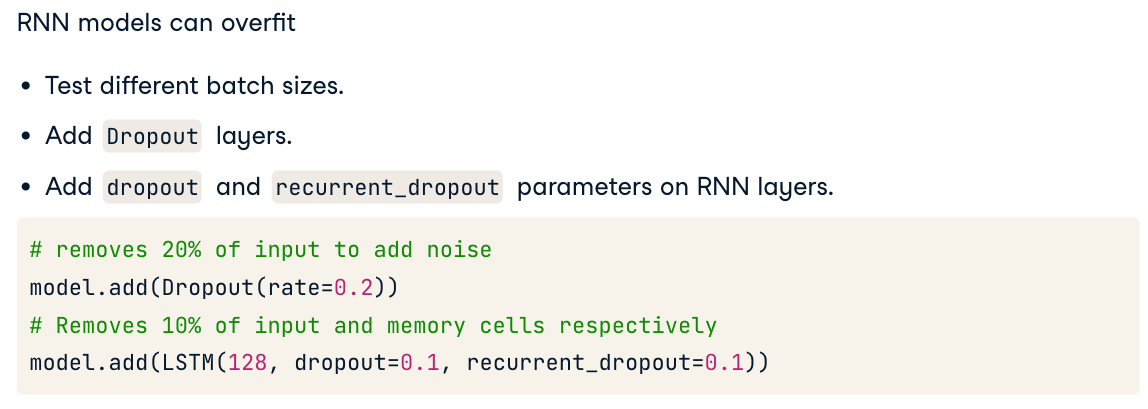

**Extra: Convolution Layer** Despite not being in the scope of this course, the mix of convolution and max pooling layers with RNN cells has been used recently and achieved state of the art results in NLP problems. In short, the convolution layer has filters that determines the output dimension, kernel size which is the window size for convolution and padding which determines if the input should be padded (add zeros around the matrix) or not. The max pooling contains the parameter pool size that determines the window to look for the max value. For more details on convolution and max pooling layers, search for convolution courses on DataCamp.
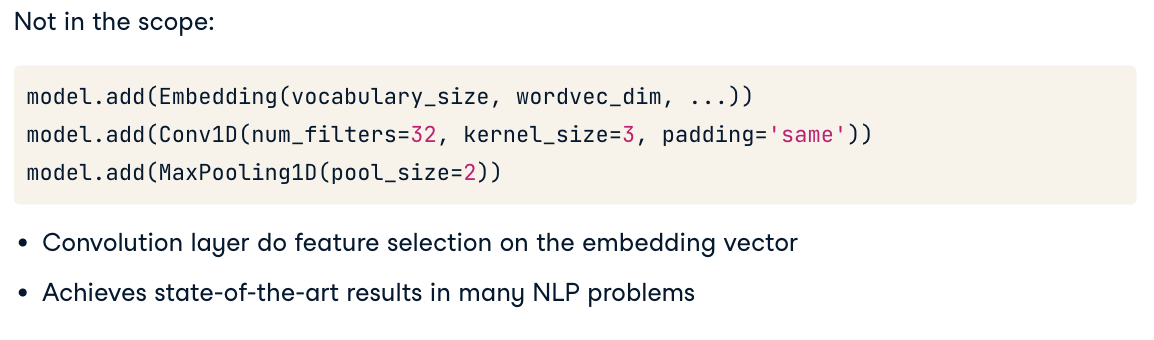

**One example model** We created a model after some iterations of tests and parameter tuning to obtain high accuracy on the sentiment classification task. The model architecture is Using the embedding layer in the first layer of the model Add a dense layer add one LSTM layer Add one GRU layer Add two other dense layers Add another dense with one unit as output layer The dropout layers are to avoid overfitting by adding extra noise to the data (by removing some of the inputs).
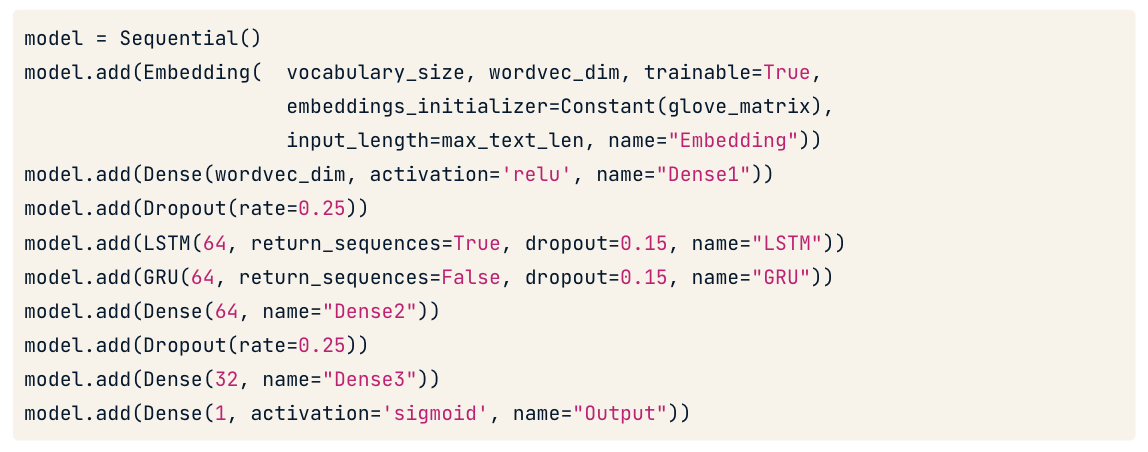

# Multi-Class Classification

**Learning Objectives:**
- how to prepare data for the multi-class classification task
- differences between multi-class classification and binary classification (sentiment analysis)
- how to create models and measure their performance with Keras

### Data PreProcessing
### Transfer Learning for Language Models
### Multi-Class Classification Models
### Assessing the Model's Performance

# Sequence to Sequence Models

**Learning Objectives:**
- two applications of RNN models: 
    - Text Generation
    - Neural Machine Translation
- how to prepare the text data to the format needed by the model

### Sequence to Sequence Models
### The Text Generation Function
### Text Generation Models
### Neural Machine Translation